In [144]:
from pathlib import Path
import math
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from kirin import Kirin
from experiment.masters.jh_model import TestModel
from experiment.masters.jh_model import tensor_z
from experiment.masters.jh_model import Attention

In [151]:
api = Kirin()
CONM = api.compustat.read_sql("select gvkey, conm from company;").set_index("gvkey")
TIC = api.compustat.read_sql("select gvkey || '_' || iid as gvkey_iid, tic from security;").set_index("gvkey_iid")

✓ [Compustat API] : Cleaning past days cache done in 0.001 secs
auto caching이 활성화 되었습니다. /tmp/sronly/kirin_api_cache/2.18.17_2021-07-05에 캐쉬를 저장합니다.


In [4]:
pd.set_option("display.max_rows", 200)

In [77]:
TRAD_NAMES = [
    "pr_1m_0m_cross",
    "mv_cross",
    "btm_cross",
    "mom_12m_1m_cross",
    "ram_12m_0m_cross",
    "vol_3m_cross",
    "res_mom_12m_1m_0m_cross",
    "res_vol_6m_3m_0m_cross",
    "asset_turnover_cross",
    "gpa_cross",
    "rev_surp_cross",
    "cash_at_cross",
    "op_lev_cross",
    "roe_cross",
    "std_u_e_cross",
    "ret_noa_cross",
    "etm_cross",
    "ia_mv_cross",
    "ae_m_cross",
    "ia_ta_cross",
    "rc_a_cross",
    "r_s_cross",
    "r_a_cross",
    "fred_ff_cross",
    "t3m_cross",
    "t6m_cross",
    "t2y_cross",
    "t3y_cross",
    "t5y_cross",
    "t7y_cross",
    "t10y_cross",
    "aaa_cross",
    "baa_cross",
    "snp500_pr_cross",
    "wilshire500_pr_cross",
    "ted_cross",
    "t1y_ff_cross",
    "t5y_ff_cross",
    "t10y_t2y_cross",
    "aaa_t10y_cross",
    "baa_t10y_cross",
    "aaa_ff_cross",
    "baa_ff_cross",
    "core_cpi_cross",
    "core_pce_cross",
    "core_ppi_cross",
    "cpi_cross",
    "pce_cross",
    "ppi_cross",
    "trimmed_pce_cross",
    "unemploy_cross",
    "retail_mfr_cross",
    "m1_cross",
    "m2_cross",
    "export_growth_cross",
    "import_growth_cross",
    "real_gig_cross",
    "real_pig_cross",
    "federal_tg_cross",
    "real_gdp_cross",
    "corporate_tg_cross",
    "industrial_prod_cross",
    "home_pr_cross",
    "wti_cross",
    "capa_util_cross",
    "snp500_pe_cross",
    "snp500_vol_cross",
    "pr_1m_0m_serial",
    "mv_serial",
    "btm_serial",
    "mom_12m_1m_serial",
    "ram_12m_0m_serial",
    "vol_3m_serial",
    "res_mom_12m_1m_0m_serial",
    "res_vol_6m_3m_0m_serial",
    "asset_turnover_serial",
    "gpa_serial",
    "rev_surp_serial",
    "cash_at_serial",
    "op_lev_serial",
    "roe_serial",
    "std_u_e_serial",
    "ret_noa_serial",
    "etm_serial",
    "ia_mv_serial",
    "ae_m_serial",
    "ia_ta_serial",
    "rc_a_serial",
    "r_s_serial",
    "r_a_serial",
    "fred_ff_serial",
    "t3m_serial",
    "t6m_serial",
    "t2y_serial",
    "t3y_serial",
    "t5y_serial",
    "t7y_serial",
    "t10y_serial",
    "aaa_serial",
    "baa_serial",
    "snp500_pr_serial",
    "wilshire500_pr_serial",
    "ted_serial",
    "t1y_ff_serial",
    "t5y_ff_serial",
    "t10y_t2y_serial",
    "aaa_t10y_serial",
    "baa_t10y_serial",
    "aaa_ff_serial",
    "baa_ff_serial",
    "core_cpi_serial",
    "core_pce_serial",
    "core_ppi_serial",
    "cpi_serial",
    "pce_serial",
    "ppi_serial",
    "trimmed_pce_serial",
    "unemploy_serial",
    "retail_mfr_serial",
    "m1_serial",
    "m2_serial",
    "export_growth_serial",
    "import_growth_serial",
    "real_gig_serial",
    "real_pig_serial",
    "federal_tg_serial",
    "real_gdp_serial",
    "corporate_tg_serial",
    "industrial_prod_serial",
    "home_pr_serial",
    "wti_serial",
    "capa_util_serial",
    "snp500_pe_serial",
    "snp500_vol_serial",
]
FF_NAMES = [
    'Whole_1_cross',
    'Whole_2_cross',
    'Whole_3_cross',
    'Whole_4_cross',
    'IT&Comm_1_cross',
    'IT&Comm_2_cross',
    'IT&Comm_3_cross',
    'IT&Comm_4_cross',
    'Health_1_cross',
    'Health_2_cross',
    'Health_3_cross',
    'Health_4_cross',
    'Con Dis_1_cross',
    'Con Dis_2_cross',
    'Con Dis_3_cross',
    'Con Dis_4_cross',
    'Fin&Estate_1_cross',
    'Fin&Estate_2_cross',
    'Fin&Estate_3_cross',
    'Fin&Estate_4_cross',
    'Ind_1_cross',
    'Ind_2_cross',
    'Ind_3_cross',
    'Ind_4_cross',
    'En&Util_1_cross',
    'En&Util_2_cross',
    'En&Util_3_cross',
    'En&Util_4_cross',
    'Materials_1_cross',
    'Materials_2_cross',
    'Materials_3_cross',
    'Materials_4_cross',
    'Con Stpl_1_cross',
    'Con Stpl_2_cross',
    'Con Stpl_3_cross',
    'Con Stpl_4_cross',
    'Whole_1_serial',
    'Whole_2_serial',
    'Whole_3_serial',
    'Whole_4_serial',
    'IT&Comm_1_serial',
    'IT&Comm_2_serial',
    'IT&Comm_3_serial',
    'IT&Comm_4_serial',
    'Health_1_serial',
    'Health_2_serial',
    'Health_3_serial',
    'Health_4_serial',
    'Con Dis_1_serial',
    'Con Dis_2_serial',
    'Con Dis_3_serial',
    'Con Dis_4_serial',
    'Fin&Estate_1_serial',
    'Fin&Estate_2_serial',
    'Fin&Estate_3_serial',
    'Fin&Estate_4_serial',
    'Ind_1_serial',
    'Ind_2_serial',
    'Ind_3_serial',
    'Ind_4_serial',
    'En&Util_1_serial',
    'En&Util_2_serial',
    'En&Util_3_serial',
    'En&Util_4_serial',
    'Materials_1_serial',
    'Materials_2_serial',
    'Materials_3_serial',
    'Materials_4_serial',
    'Con Stpl_1_serial',
    'Con Stpl_2_serial',
    'Con Stpl_3_serial',
    'Con Stpl_4_serial'
]

ALT_NAMES = [
    'job_1_cross',
    'job_2_cross',
    'rp_1_cross',
    'rp_2_cross',  # rp_feat_50_5_90
    'rp_4_cross',
    'rp_5_cross',
    'rp_3_cross',
    'rp_6_cross',
    'rp_7_cross',
    'job_1_serial',
    'job_2_serial',
    'rp_1_serial',
    'rp_2_serial',  # rp_feat_50_5_90
    'rp_4_serial',
    'rp_5_serial',
    'rp_3_serial',
    'rp_6_serial',
    'rp_7_serial'
]

In [7]:
test_model = TestModel(
    identifier="a",
    sub_identifier="a",
    model_name="a",
    input_names=["x", "ffs", "alts"],
    target_names=["y"],
    forward_names=[],
    data_shape={"x": (36, 67), "y": (1, 1), "ffs": (36, 36), "alts": (36, 9)},
    device="cuda",
    save_path="/home/sronly/sr-storage/tmppath",
    cross_units=[64, 32],
    alt_cross_units=[9, 4],
    ff_cross_units=[8, 4],
    batch_units=[40, 16],
    dropout=0.0,
    layer_norm=True,
    noise=0.01,
    learning_rate=3e-4,
    weight_decay=3e-5,
    huber_loss_positive_beta=1.0,
    huber_loss_negative_beta=1.0,
    stage=(10, 20),
)

[a/a | get_logger | INFO]: ====================a/a start====================


In [194]:
def get_attention_map(layer, names=None):
    assert isinstance(layer, Attention)
    
    qw = layer.q_fc._linear.weight
    kw = layer.k_fc._linear.weight
    
    attn = torch.matmul(qw.T, kw).detach().cpu().numpy()
    
    if names is None:
        names = [f"feat{i:02}" for i in range(len(attn))]

    return pd.DataFrame(attn, index=names, columns=names)

def softmax_map(attn):
    arr = attn.values
    arr = np.exp(arr) / np.exp(arr).sum()
    return pd.DataFrame(arr, index=FACTOR_NAMES, columns=FACTOR_NAMES)

def summing(attn, axis):
    return attn.sum(axis).sort_values(ascending=False)

def get_processed(batch, model):
    cuda_index = model.net.imputation_layer.weight.device.index
    x = torch.from_numpy(batch["x"][np.newaxis, ...]).cuda(cuda_index).float()
    ffs = torch.from_numpy(batch["ffs"][np.newaxis, ...]).cuda(cuda_index).float()
    alts = torch.from_numpy(batch["alts"][np.newaxis, ...]).cuda(cuda_index).float()
    

    ix, ils_x = model.net.imputation_layer(x)
    iff, ils_ff = model.net.ff_imputation_layer(ffs)
    ialt, ils_alt = model.net.alts_imputation_layer(alts)
    
    ix_cr = tensor_z(ix, dim=-1)
    ix_sr = tensor_z(ix, dim=-2)
    ix2 = torch.cat([ix_cr, ix_sr], dim=-1)
    
    iff_cr = tensor_z(iff, dim=-1)
    iff_sr = tensor_z(iff, dim=-2)
    iff2 = torch.cat([iff_cr, iff_sr], dim=-1)
    
    ialt_cr = tensor_z(ialt, dim=-1)
    ialt_sr = tensor_z(ialt, dim=-2)
    ialt2 = torch.cat([ialt_cr, ialt_sr], dim=-1)

    return ix2, iff2, ialt2


def get_last_attn(batch, model, index):
    x, ffs, alts = get_processed(batch, model)
    
    x = model.net.cross_layers(x)
    x = x.mean(dim=2)
    
    alts = model.net.alts_cross_layers(alts)
    alts = alts.mean(dim=2)

    ffs = model.net.ff_cross_layers(ffs)
    ffs = ffs.mean(dim=2)

    x = torch.cat([x,alts,ffs], dim=-1)
    
    num = len(model.net.batch_layers)
    for i in range(num - 1):
        x = model.net.batch_layers[i](x)
    
    layer: Attention = model.net.batch_layers[-1]

    q = layer.q_fc(x)
    k = layer.k_fc(x)

    attn = torch.matmul(q, torch.transpose(k, 1, 2))
    attn = attn.detach().cpu().numpy().squeeze()
    attn = pd.DataFrame(attn, index=index, columns=index)
    
    return attn

In [208]:
DATE = "2021-04-30"
UNIV = "U3"

saved = torch.load(f"/home/sronly/sr-storage/alt_ff_48months/model/{DATE}/custom_model/reset_00/23.pth")
for key, val in saved["model"].items():
    setattr(test_model, key, val)

with open(f"/home/sronly/sr-storage/alt_ff_48months/batch_dataset/{UNIV}/d!{DATE} 00:00:00b!T.pkl", 'rb') as f:
    sample = pickle.load(f)
    sec_sam = sample.meta["SECURITY"]

with open(f"/home/sronly/sr-storage/alt_ff_48months/batch_dataset/ffs/d!{DATE} 00:00:00b!T.pkl", 'rb') as f:
    ffs = pickle.load(f)
    sec_ffs = ffs.meta["SECURITY"]
    ffs_in_sam = np.isin(sec_ffs, sec_sam)
    
    for k, v in ffs.data.items():
        ffs.data[k] = v[ffs_in_sam]
    
    for k, v in ffs.meta.items():
        ffs.meta[k] = v[ffs_in_sam]


infer_batch = sample.data
infer_batch.update(ffs.data)
sec_keys = sample.meta["SECURITY"]
conm_keys = [CONM.loc[e.split("_")[0], "conm"] for e in sec_keys]
tic_keys = [TIC.loc[e, "tic"] for e in sec_keys]
m_keys = pd.MultiIndex.from_tuples(zip(conm_keys, tic_keys))

In [209]:
lattn = get_last_attn(infer_batch, test_model, m_keys)
lattn.to_csv("U3_between-stock-attn.csv")

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

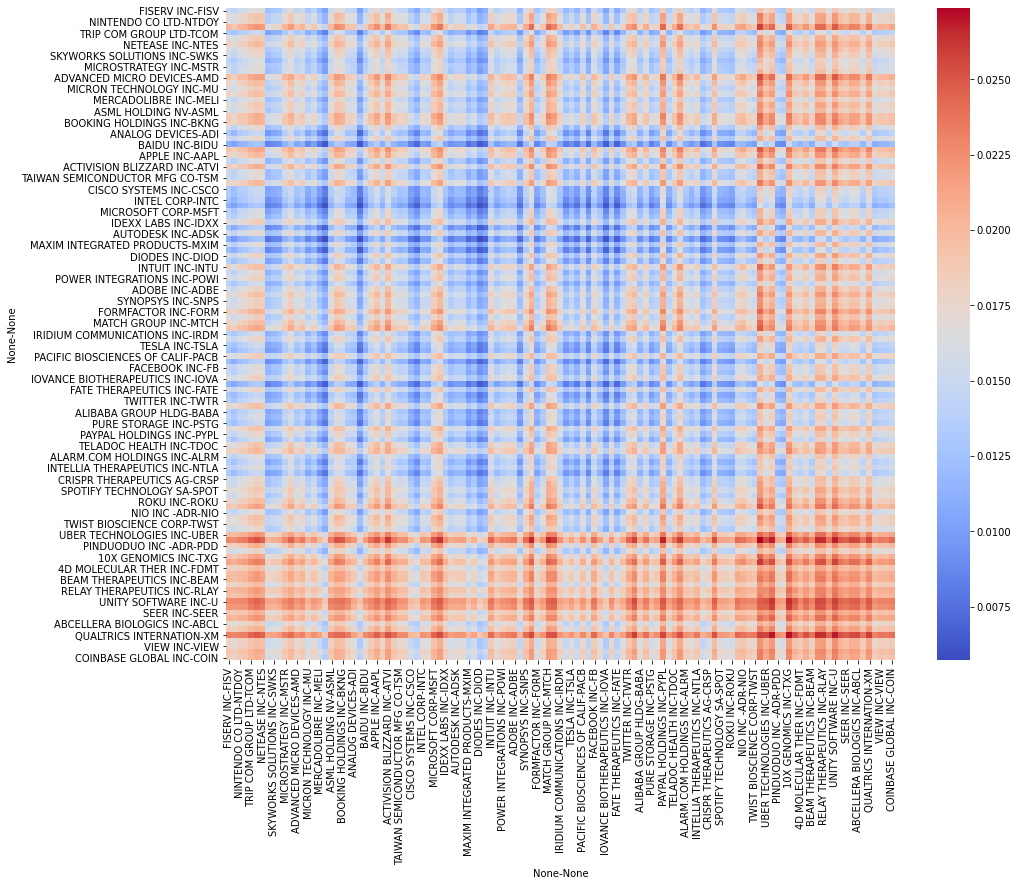

In [203]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(
    lattn,
    cmap='coolwarm',
    ax=ax
)

In [67]:
trad_attn = get_attention_map(test_model.net.cross_layers[0], TRAD_NAMES)
ff_attn = get_attention_map(test_model.net.ff_cross_layers[0], FF_NAMES)
alt_attn = get_attention_map(test_model.net.alts_cross_layers[0], ALT_NAMES)

In [68]:
alt_attn

,job_1_cross,job_2_cross,rp_1_cross,rp_2_cross,rp_4_cross,rp_5_cross,rp_3_cross,rp_6_cross,rp_7_cross,job_1_serial,job_2_serial,rp_1_serial,rp_2_serial,rp_4_serial,rp_5_serial,rp_3_serial,rp_6_serial,rp_7_serial
job_1_cross,0.001878,-0.005126,0.014532,0.006782,0.003082,-0.000899,-0.003710,-0.002963,-0.003311,-0.002413,-0.001466,0.004312,-0.001884,0.000606,-0.006079,-0.003893,-0.005435,-0.003086
job_2_cross,-0.001664,-0.000453,0.002725,0.001709,0.000019,-0.000720,0.000596,0.000278,0.000497,0.000274,-0.000919,-0.002139,0.001285,-0.000367,-0.000709,0.000376,0.000351,0.000300
rp_1_cross,0.000418,-0.003753,0.005386,-0.005452,0.002231,0.001656,0.001765,-0.001107,0.000026,-0.000801,0.000563,0.005150,0.003805,0.001131,-0.003008,-0.001720,-0.001226,0.001389
rp_2_cross,-0.000821,-0.000217,0.005888,0.004223,-0.001115,-0.000420,-0.000153,0.001520,0.001739,0.000897,-0.003636,-0.002153,-0.002540,-0.002054,-0.001552,0.000640,-0.000140,0.003930
rp_4_cross,-0.002327,-0.000345,-0.000999,0.002980,0.001935,0.001950,0.001692,0.003590,0.004209,-0.000188,-0.000331,-0.001243,-0.004555,0.003457,0.000585,0.002358,0.000977,0.002852
rp_5_cross,0.000883,-0.001768,0.003430,0.001100,0.000559,0.000546,0.001337,-0.000628,0.000143,0.000313,-0.000617,0.004193,0.001571,0.001204,-0.001293,-0.000814,-0.001436,0.001792
rp_3_cross,0.000079,0.000006,-0.009069,-0.004596,0.000023,0.001331,0.002411,-0.000738,0.000538,0.000387,-0.000361,0.000685,0.002159,0.000212,0.005760,0.001099,0.000704,-0.001509
rp_6_cross,0.001118,-0.004974,0.002336,0.004006,0.001226,-0.000247,0.000240,-0.001670,0.000260,0.000725,-0.002359,-0.001384,0.002859,0.002357,0.000781,-0.000242,-0.000663,-0.001215
rp_7_cross,0.001745,-0.002891,0.004708,0.001597,0.001373,-0.000012,0.000745,-0.003730,-0.002952,-0.000894,-0.001482,0.007723,0.002900,-0.000091,-0.000217,-0.002707,-0.004595,-0.002389
job_1_serial,0.000011,0.002920,0.003148,0.005439,-0.000858,-0.001397,-0.003563,0.002479,0.000250,-0.000210,0.001411,-0.003515,-0.005943,0.000210,-0.003943,0.000407,0.000852,0.001458


In [38]:
test_model.net.ff_cross_layers[0]

Attention(
  (q_fc): InitLinear(
    (_linear): Linear(in_features=72, out_features=8, bias=False)
  )
  (k_fc): InitLinear(
    (_linear): Linear(in_features=72, out_features=8, bias=False)
  )
  (v_fc): InitLinear(
    (_linear): Linear(in_features=72, out_features=8, bias=False)
  )
  (o_fc): InitLinear(
    (_linear): Linear(in_features=8, out_features=8, bias=False)
  )
  (fc1): InitLinear(
    (_linear): Linear(in_features=8, out_features=8, bias=True)
  )
  (fc2): InitLinear(
    (_linear): Linear(in_features=8, out_features=8, bias=True)
  )
  (attn_dropout): Identity()
  (fc_dropout): Identity()
  (attn_layer_norm): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (fc_layer_norm): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
)

In [25]:
ffs.meta["SECURITY"]

array(['157855_01', '117768_01', '160329_01', '064768_01', '201395_90',
       '012141_01', '147579_01', '184996_01', '170617_01', '020530_90',
       '024616_01'], dtype='<U9')

In [16]:
ffs.meta.keys()

dict_keys(['SECURITY', 'DATE_VALUE', 'DATE_NUMBER'])

In [17]:
sample.meta.keys()

dict_keys(['SECURITY', 'DATE_VALUE', 'DATE_NUMBER'])

In [23]:
ffs.meta["SECURITY"].size, sample.meta["SECURITY"]

(11647,
 array(['157855_01', '117768_01', '160329_01', '064768_01', '201395_90',
        '012141_01', '147579_01', '184996_01', '170617_01', '020530_90',
        '024616_01'], dtype='<U9'))

In [303]:
attn = get_attention_map(test_model)

ss = summing(attn, 0) + summing(attn, 1)
ss = ss.sort_values(ascending=False)
ss = (ss - ss.min()) / (ss.max() - ss.min())
ss.to_csv(f"{DATE}_summing.csv")

In [277]:
sec_key[3]

'064768_01'

In [275]:
x = get_preprocessed(infer_batch, test_model)
print(x.shape)

imp loss:0.3434
(7, 36, 134)


In [282]:
FACTOR_NAMES.index('mv_cross')

1

In [284]:
x[3, :, 1].mean()

0.46815598

In [291]:
FACTOR_NAMES.index('federal_tg_serial')

125

In [293]:
x[3, :, 125].mean()

9.934108e-09